In [1]:
#this is to learn and simulate 
#E and I nerons do not mix randomly 
#EI_network0807-unmix-optimise-batch-GLM-log_prop
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn.functional as F
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D


torch.manual_seed(42)



n=10
m=100
d=10

tao=100
dt = 1e-2
T=int(10/dt)

B=10
w=torch.randn(n,n, device='cpu', requires_grad=True,dtype=torch.float)

w2=torch.randn(d,d, device='cpu', requires_grad=True,dtype=torch.float)

lr = 1e-1
n_epochs = 100

optimizer = optim.Adam([w,w2], lr=lr)
V=torch.zeros(T,n)
ep=np.arange(n_epochs)
Loss=torch.zeros(n_epochs,)
#generatiining the penalty matrix 
P1=(np.absolute(np.random.randint(low=2, high=100, size=math.ceil(n/2))))
p_ones=torch.ones(int(math.ceil(n/2)),dtype=torch.float)
p2s=torch.from_numpy(np.append(P1,p_ones))
p2ss=np.sort(p2s)
p2sss=p2ss[::-1]
p2=torch.from_numpy(p2sss.copy())

p3=torch.diag(p2)
p1=p3.type(dtype=torch.float)


b=torch.zeros(m,1,d)
mu=torch.zeros(m,1,n) #dimension m x1 xn
Lamda=torch.eye(n,n) #dimension n x n
L=torch.eye(d,d) #dimension d x d
A= torch.rand(n,d) #dimension n x d
bos=A@L@torch.transpose(A,0,1)
Sigma=torch.inverse(torch.transpose(Lamda,0,1)+bos)


Tr1=torch.ones(int(math.ceil(n/2)),dtype=torch.float)
Tr2=torch.ones(int(round(n/2)),dtype=torch.float)
Tr=torch.cat((Tr1,-Tr2),0)
Transform=torch.diag(Tr)


z_sample= torch.distributions.multivariate_normal.MultivariateNormal(mu,torch.inverse(torch.transpose(Lamda,0,1)))
z1=z_sample.sample()
z_softplus=F.softplus(z1)
z=z_softplus@Transform
    

x_sample= torch.distributions.multivariate_normal.MultivariateNormal((z@A)+b, torch.inverse(torch.transpose(L,0,1)))
x=x_sample.sample()
    
for epoch in range(n_epochs):
   
  
    print (epoch)
    
    Tr1=torch.ones(int(math.ceil(n/2)),dtype=torch.float)
    Tr2=torch.ones(int(round(n/2)),dtype=torch.float)
    Tr=torch.cat((Tr1,-Tr2),0)
    Transform=torch.diag(Tr)
    #print (Transform.size())
    
    z_sample= torch.distributions.multivariate_normal.MultivariateNormal(mu,torch.inverse(torch.transpose(Lamda,0,1)))
    z1=z_sample.sample()
    z_softplus=F.softplus(z1)
    z=z_softplus@Transform
    
    #print (z)
    
   
    
    
    
    
    




    w_softplus=F.softplus(w)
    wi=w_softplus@Transform
    w1=torch.diag(wi)
    w_rec=torch.diag(w1)
    w1_rec = wi-w_rec
    
    
    #print (w1_rec)
    pos1=(x-b)@torch.transpose(L,0,1)@torch.transpose(A,0,1)+mu@torch.transpose(Lamda,0,1)
    pos2=pos1@Sigma
    pos_sample=torch.distributions.multivariate_normal.MultivariateNormal(pos2, Sigma)
    pos=pos_sample.sample()


    
    loss=0
    for t in range(T):
        
        
        N=torch.randn(m,1,n)
        r=torch.relu(z)
        z_dot=(-z+(r@w1_rec+(x@w2))/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
    
        

        loss = loss - torch.mean((pos_sample.log_prob(z)))
        
    
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    Loss[epoch]=loss
   
 







0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


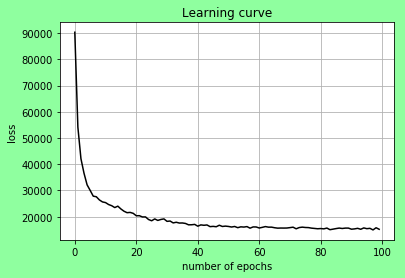

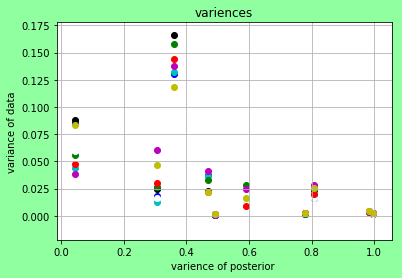

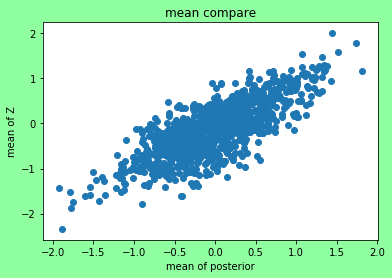

In [2]:

#this is to plot the graph 
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.title('Learning curve')
df=pd.DataFrame(Loss.detach().numpy())
rolling_mean = df.rolling(window=1).mean()
plt.plot(ep, rolling_mean, label='Learning Curve', color='k')
plt.grid(True)
plt.show()



fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('variance of data')
plt.xlabel('varience of posterior ')
plt.title('variences')
plt.grid(True)
color=['b','c','k','g','w','m','r','y']
for a in range(8):
    
    
    Tr1=torch.ones(int(math.ceil(n/2)),dtype=torch.float)
    Tr2=torch.ones(int(round(n/2)),dtype=torch.float)

    Tr=torch.cat((Tr1,-Tr2),0)
    Transform=torch.diag(Tr)
    
    
    z_sample= torch.distributions.multivariate_normal.MultivariateNormal(mu,torch.inverse(torch.transpose(Lamda,0,1)))
    z1=z_sample.sample()
    z_softplus=F.softplus(z1)
    z=z_softplus@Transform
    

    


    Z=torch.zeros(T,m,1,n)
  
    for t in range(T):
        N=torch.randn(1,n)
        r=torch.relu(z)
        z_dot=(-z+(r@w1_rec+(x@w2))/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        

        Z[t] = z

        Z_split = torch.split(Z,int(T/2),dim=0)[1]
        Z_split1 = torch.split(Z,int(T/4),dim=0)[1]
        
        
      
       
        #pos_sample=torch.distributions.multivariate_normal.MultivariateNormal(pos2, Sigma)
        
        
        
    V=np.zeros((n,1),dtype=float)

    
  
    
    eigvalue_var,eigvector=np.linalg.eig(Sigma)
    #eigvalue_var=a.type(dtype=torch.float)
    
    
    #eig=torch.eig(Sigma,eigenvectors=True)
   # eigvalue_var=eig[0][:,0] #compute the varience along the eigenvector
    #torch.sort(eigvalue_var)[0]
    #eigvector=eig[1]

    for i in range(n):
        direction=eigvector[i].reshape(n,1)
        new_Z=(Z_split.detach().numpy()@direction)@np.transpose(direction)
        
        V[i]=np.var(new_Z[:,:,:,i])  
        
    plt.scatter(eigvalue_var,V,color=color[a])   
    #plt.plot(eigvalue_var.detach().numpy(),V.detach().numpy(),color=color[a]) 
    
    
    
plt.show() 



mean_Z2=torch.zeros(m,1,n)
for c in range(int(T)):
    for a in range (m):
        for b in range (n):
            mean_Z2[a,:,b]= mean_Z2[a,:,b] + Z[c,a,:,b]
            
mean_Z=mean_Z2/(int(T))





fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('mean of Z')
plt.xlabel('mean of posterior')
plt.title('mean compare')
plt.scatter(pos2.view(1,int(m*n)).detach().numpy(),mean_Z.view(1,int(m*n)).detach().numpy()) 







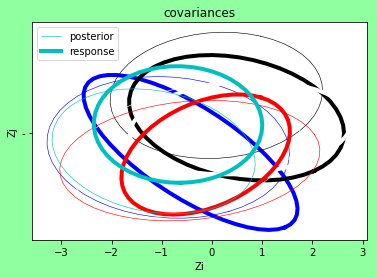

In [3]:

fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('Zj')
plt.xlabel('Zi')
plt.title('covariances')

color=['b','c','k','w','w','m','r','y','c']
for i in range(0,n-1,2):

    a=0
    Z_data=torch.zeros(T,n)
    for c in range(int(T)):
        for b in range (n):
            Z_data[c,b]= Z[c,a,:,b]


    z_data=np.array([Z_data[:,i].detach().numpy(),Z_data[:,int(i+1)].detach().numpy()])

    covariance=np.cov(z_data)


    eigvalue_var2,eigvector2=np.linalg.eig(covariance)
    largest_eigenval=np.amax(eigvalue_var2)
    largest_eigenvec=eigvector2[np.where(eigvalue_var2 == np.amax(eigvalue_var2))]
    smallest_eigenval =np.amin(eigvalue_var2)
    smallest_eigenvec =eigvector2[np.where(eigvalue_var2 == np.amin(eigvalue_var2))]

    angle = np.arctan(largest_eigenvec[:,1]/largest_eigenvec[:,0])

    if angle < 0:
        angle = angle + 2*np.pi
    
    avg=np.array([Z_data[:,i].detach().numpy().mean(),Z_data[:,i+1].detach().numpy().mean()])
    

    phi=angle
    chisquare_val = 3.0347
   
    a=chisquare_val*math.sqrt(largest_eigenval)
    b=chisquare_val*math.sqrt(smallest_eigenval)
    theta_grid = np.linspace(0,2*np.pi)
    ellipse_x_r  = a*np.cos( theta_grid )
    ellipse_y_r  = b*np.sin( theta_grid )

    R = np.array([[np.cos(phi),np.sin(phi)],[-np.sin(phi),np.cos(phi)]],dtype=float)
    R1=np.asarray(R).reshape(2,2)
    ellipse_r=np.array([ellipse_x_r,ellipse_y_r])


    r_ellipse =  np.transpose(ellipse_r)@R1


    plt.plot(r_ellipse[:,0]+avg[0],r_ellipse[:,1]+avg[1] ,'-',color=color[i],linewidth=4)



    Sigma2=Sigma[int(i):int(i+2),int(i):int(i+2)]

    eigvalue_var2,eigvector2=np.linalg.eig(Sigma2)
    largest_eigenval=np.amax(eigvalue_var2)
    largest_eigenvec=eigvector2[np.where(eigvalue_var2 == np.amax(eigvalue_var2))]
    smallest_eigenval =np.amin(eigvalue_var2)
    smallest_eigenvec =eigvector2[np.where(eigvalue_var2 == np.amin(eigvalue_var2))]

    angle = np.arctan(largest_eigenvec[:,1]/largest_eigenvec[:,0])

    if angle < 0:
        angle = angle + 2*np.pi
        
    avg=np.array([pos2[int(a),:,int(i)].detach().numpy().mean(),pos2[int(a),:,int(i+1)].detach().numpy().mean()])

    phi=angle
    chisquare_val = 3.0347
   

    a=chisquare_val*math.sqrt(largest_eigenval)
    b=chisquare_val*math.sqrt(smallest_eigenval)

    theta_grid = np.linspace(0,2*np.pi)

    ellipse_x_r  = a*np.cos( theta_grid )
    ellipse_y_r  = b*np.sin( theta_grid )


    R = np.array([[np.cos(phi),np.sin(phi)],[-np.sin(phi),np.cos(phi)]],dtype=float)
    R1=np.asarray(R).reshape(2,2)
    ellipse_r=np.array([ellipse_x_r,ellipse_y_r])


    r_ellipse =  np.transpose(ellipse_r)@R1



    plt.plot(r_ellipse[:,0]+avg[0],r_ellipse[:,1]+avg[1] ,'-',color=color[i],linewidth=0.6)
    #s=-2*log(1-p)

plt.plot('-',color=color[i],linewidth=0.6,label="posterior")
plt.plot('-',color=color[i],linewidth=4,label="response")
plt.legend()
plt.show()

